夏目漱石の小説『吾輩は猫である』の文章（[neko.txt](http://www.cl.ecei.tohoku.ac.jp/nlp100/data/neko.txt)）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39はmatplotlibもしくはGnuplotを用いるとよい．

In [1]:
import MeCab
import requests
import shutil
import sys

r = requests.get("http://www.cl.ecei.tohoku.ac.jp/nlp100/data/neko.txt", stream=True)

with open("neko.txt", 'wb') as f:
    r.raw.decode_content = True
    shutil.copyfileobj(r.raw, f)

! mecab neko.txt -o neko.txt.mecab
! head -n 20 neko.txt.mecab

一	名詞,数,*,*,*,*,一,イチ,イチ
EOS
EOS
　	記号,空白,*,*,*,*,　,　,　
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。
EOS
名前	名詞,一般,*,*,*,*,名前,ナマエ,ナマエ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
まだ	副詞,助詞類接続,*,*,*,*,まだ,マダ,マダ
無い	形容詞,自立,*,*,形容詞・アウオ段,基本形,無い,ナイ,ナイ
。	記号,句点,*,*,*,*,。,。,。
EOS
EOS
　	記号,空白,*,*,*,*,　,　,　
どこ	名詞,代名詞,一般,*,*,*,どこ,ドコ,ドコ


---

### 30. 形態素解析結果の読み込み
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [2]:
import numpy as np
import re

def neko_mecabed():
    keys = [(0, 'surface'), (7, 'base'), (1, 'pos'), (2, 'pos1')]

    def todict(word):
        return dict((key, word[idx]) for idx, key in keys)

    with open("neko.txt.mecab", "rt") as neko:
        return [[todict(re.split('[\t,]', word)) for word in line.split('\n') if len(word) >= 4]
               for line in re.split(r'EOS\n', neko.read()) if len(line) is not 0]

print(neko_mecabed()[0:2])

[[{'pos': '名詞', 'pos1': '数', 'surface': '一', 'base': '一'}], [{'pos': '記号', 'pos1': '空白', 'surface': '\u3000', 'base': '\u3000'}, {'pos': '名詞', 'pos1': '代名詞', 'surface': '吾輩', 'base': '吾輩'}, {'pos': '助詞', 'pos1': '係助詞', 'surface': 'は', 'base': 'は'}, {'pos': '名詞', 'pos1': '一般', 'surface': '猫', 'base': '猫'}, {'pos': '助動詞', 'pos1': '*', 'surface': 'で', 'base': 'だ'}, {'pos': '助動詞', 'pos1': '*', 'surface': 'ある', 'base': 'ある'}, {'pos': '記号', 'pos1': '句点', 'surface': '。', 'base': '。'}]]


### 31. 動詞
動詞の表層形をすべて抽出せよ．

In [3]:
[word["surface"] for line in neko_mecabed() for word in line if word["pos"] == "動詞"][:10]

['生れ', 'つか', 'し', '泣い', 'し', 'いる', '始め', '見', '聞く', '捕え']

### 32. 動詞の原形
動詞の原形をすべて抽出せよ．

In [4]:
[word["base"] for line in neko_mecabed() for word in line if word["pos"] == "動詞"][:10]

['生れる', 'つく', 'する', '泣く', 'する', 'いる', '始める', '見る', '聞く', '捕える']

### 33. サ変名詞
サ変接続の名詞をすべて抽出せよ．

In [5]:
[word for line in neko_mecabed() for word in line if word["pos"] == "名詞" and word["pos1"] == "サ変接続"][:10]

[{'base': '見当', 'pos': '名詞', 'pos1': 'サ変接続', 'surface': '見当'},
 {'base': '記憶', 'pos': '名詞', 'pos1': 'サ変接続', 'surface': '記憶'},
 {'base': '話', 'pos': '名詞', 'pos1': 'サ変接続', 'surface': '話'},
 {'base': '装飾', 'pos': '名詞', 'pos1': 'サ変接続', 'surface': '装飾'},
 {'base': '突起', 'pos': '名詞', 'pos1': 'サ変接続', 'surface': '突起'},
 {'base': '運転', 'pos': '名詞', 'pos1': 'サ変接続', 'surface': '運転'},
 {'base': '記憶', 'pos': '名詞', 'pos1': 'サ変接続', 'surface': '記憶'},
 {'base': '分別', 'pos': '名詞', 'pos1': 'サ変接続', 'surface': '分別'},
 {'base': '決心', 'pos': '名詞', 'pos1': 'サ変接続', 'surface': '決心'},
 {'base': '我慢', 'pos': '名詞', 'pos1': 'サ変接続', 'surface': '我慢'}]

### 34. 「AのB」
2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [6]:
["".join(map(lambda w: w["surface"], words)) for words in [(word[0], word[1], word[2])
    for line in neko_mecabed()
    for word in zip(line, line[1:], line[2:])
        if word[0]["pos"] == "名詞" and word[1]["base"] == "の" and word[2]["pos"] == "名詞"]][:10]

['彼の掌', '掌の上', '書生の顔', 'はずの顔', '顔の真中', '穴の中', '書生の掌', '掌の裏', '何の事', '肝心の母親']

### 35. 名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [7]:
def noun_junction():
    def recur(line, idx):
        return [line[idx]] + recur(line, idx + 1) if idx < len(line) and line[idx]["pos"] == "名詞" else []
    
    def noun_indexes(line):
        return [idx for idx, word in enumerate(line) if word["pos"] == "名詞"]

    return [recur(line, idx)
            for line in neko_mecabed() if "名詞" in map(lambda w: w["pos"], line)
            for idx in noun_indexes(line)]

sorted(noun_junction(), key=len, reverse=True)[:3]

[[{'base': '*', 'pos': '名詞', 'pos1': '一般', 'surface': 'many'},
  {'base': '*', 'pos': '名詞', 'pos1': '一般', 'surface': 'a'},
  {'base': '*', 'pos': '名詞', 'pos1': '一般', 'surface': 'slip'},
  {'base': '*', 'pos': '名詞', 'pos1': 'サ変接続', 'surface': "'"},
  {'base': '*', 'pos': '名詞', 'pos1': '一般', 'surface': 'twixt'},
  {'base': '*', 'pos': '名詞', 'pos1': '一般', 'surface': 'the'},
  {'base': '*', 'pos': '名詞', 'pos1': '一般', 'surface': 'cup'},
  {'base': '*', 'pos': '名詞', 'pos1': '一般', 'surface': 'and'},
  {'base': '*', 'pos': '名詞', 'pos1': '一般', 'surface': 'the'},
  {'base': '*', 'pos': '名詞', 'pos1': '一般', 'surface': 'lip'}],
 [{'base': '明治', 'pos': '名詞', 'pos1': '固有名詞', 'surface': '明治'},
  {'base': '三', 'pos': '名詞', 'pos1': '数', 'surface': '三'},
  {'base': '十', 'pos': '名詞', 'pos1': '数', 'surface': '十'},
  {'base': '八', 'pos': '名詞', 'pos1': '数', 'surface': '八'},
  {'base': '年', 'pos': '名詞', 'pos1': '接尾', 'surface': '年'},
  {'base': '何', 'pos': '名詞', 'pos1': '数', 'surface': '何'},
  {'base': '月', '

### 36. 単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [8]:
from collections import Counter

Counter([word["base"] for line in neko_mecabed() for word in line]).most_common()[:5]

[('の', 9194), ('。', 7486), ('て', 6848), ('、', 6772), ('は', 6420)]

### 37. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

<Container object of 10 artists>

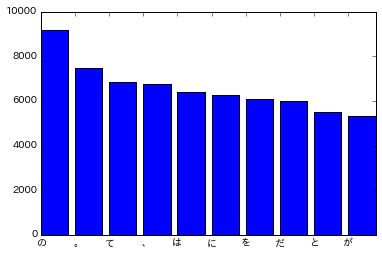

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

most_commons = Counter([word["base"] for line in neko_mecabed() for word in line]).most_common()[:10]
plt.xticks(range(10), list(map(lambda x: x[0], most_commons)))
plt.bar(range(10), list(map(lambda x: x[1], most_commons)))

### 38. ヒストグラム
単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．

### 39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせ

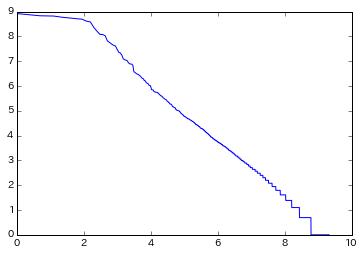

In [10]:
most_commons = Counter([word["base"] for line in neko_mecabed() for word in line]).most_common()
order = np.array([idx for idx, _ in enumerate(most_commons)])
frequency = np.array(list(map(lambda x: x[1], most_commons)))

plt.plot(np.log(order), np.log(frequency))